#Simple Data Cleaning

Data cleaning is the most crucial step in any project, if we do not take care of it properly, it might lead us to a completely different conclusion. Often than not, we might spend half of the time cleaning our data in most projects.

In this notebook, we will discuss some Python functions that can help us in data cleaning especially in:

- Dropping unused column
- Removing duplicate
- Mapping of Data
- Dealing with null data



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


###Task# 1

a. Import pandas and numpy

b. Read data from titanic.csv into a python dataframe

c. Preview the first 5 records

d. Display the metadata of titanic.csv



In [7]:
clv_data = pd.read_csv('/content/clv_data.csv')
clv_data.head()

,Unnamed: 0,id,age,gender,income,days_on_platform,city,purchases
0,0,0,NaN,Male,126895,14.0,San Francisco,0
1,1,1,NaN,Male,161474,14.0,Tokyo,0
2,2,2,24.0,Male,104723,34.0,London,1
3,3,3,29.0,Male,43791,28.0,London,2
4,4,4,18.0,Female,132181,26.0,London,2


In [8]:
clv_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        5000 non-null   int64  
 1   id                5000 non-null   int64  
 2   age               2554 non-null   float64
 3   gender            5000 non-null   object 
 4   income            5000 non-null   int64  
 5   days_on_platform  4859 non-null   float64
 6   city              5000 non-null   object 
 7   purchases         5000 non-null   int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 312.6+ KB


###Task# 2

Drop any unused or unnecessary column.



In [11]:
clv_data.drop(columns = ['Unnamed: 0', 'id'], inplace = True)
clv_data.head()

,age,gender,income,days_on_platform,city,purchases
0,NaN,Male,126895,14.0,San Francisco,0
1,NaN,Male,161474,14.0,Tokyo,0
2,24.0,Male,104723,34.0,London,1
3,29.0,Male,43791,28.0,London,2
4,18.0,Female,132181,26.0,London,2


###Task# 3

a. Identify duplicate records

b. Remove duplicate records

In [12]:
clv_data[clv_data.duplicated()]

,age,gender,income,days_on_platform,city,purchases


###Task# 4

a. Preview the distint categories in gender, city column.

In [13]:
clv_data['gender'].unique()

array(['Male', 'Female'], dtype=object)

In [15]:
clv_data['city'].unique()

array(['San Francisco', 'Tokyo', 'London', 'New York City', 'Miami'],
      dtype=object)

b. Check the data type of all the columns

In [14]:
clv_data.dtypes

,0
age,float64
gender,object
income,int64
days_on_platform,float64
city,object
purchases,int64


###Task# 5

a. Map the gender labels to two unique categories 'male', 'female'

###Task# 7

a. Preview first 20 records in the 'Age' column.

b. Do you observe any NaN values?

In [18]:
clv_data['age'].head(20)

,age
0,NaN
1,NaN
2,24.0
3,29.0
4,18.0
5,23.0
6,NaN
7,NaN
8,46.0
9,49.0


In [20]:
clv_data[clv_data['age'].isnull()]

,age,gender,income,days_on_platform,city,purchases
0,NaN,Male,126895,14.0,San Francisco,0
1,NaN,Male,161474,14.0,Tokyo,0
6,NaN,Male,51679,30.0,Tokyo,0
7,NaN,Female,53341,43.0,San Francisco,1
10,NaN,Male,159506,7.0,New York City,0
...,...,...,...,...,...,...
4995,NaN,Female,212261,28.0,San Francisco,1
4996,NaN,Male,70228,12.0,San Francisco,0
4997,NaN,Male,64995,14.0,New York City,0
4998,NaN,Male,56144,4.0,New York City,2


###Task# 8

a. Display the count of NaN in 'Age' column.

b. Replace NaN values with null values.

In [21]:
clv_data['age'].isna().sum()

np.int64(2446)

###Task# 9

a. Treat null values by imputing a mean values.

b. Treat null values by imputing a median values.

c. What do you observe between two different measures of imputation?

In [25]:
clv_data['age'] = clv_data['age'].fillna(clv_data['age'].mean())
clv_data['age']

,age
0,30.202036
1,30.202036
2,24.000000
3,29.000000
4,18.000000
...,...
4995,30.202036
4996,30.202036
4997,30.202036
4998,30.202036


In [24]:
clv_data['age'] = clv_data['age'].fillna(clv_data['age'].median())
clv_data['age']

,age
0,30.202036
1,30.202036
2,24.000000
3,29.000000
4,18.000000
...,...
4995,30.202036
4996,30.202036
4997,30.202036
4998,30.202036


In [26]:
clv_data['age'] = clv_data['age'].fillna(clv_data['age'].mode())
clv_data['age']

,age
0,30.202036
1,30.202036
2,24.000000
3,29.000000
4,18.000000
...,...
4995,30.202036
4996,30.202036
4997,30.202036
4998,30.202036


## Outlier Detection

Task# 10

a. Create a box plot on 'Age' column.

b. Analyse the box plot.

In [27]:
from scipy.stats import zscore

In [28]:
numeric_cols = ['age', 'income', 'days_on_platform', 'purchases']

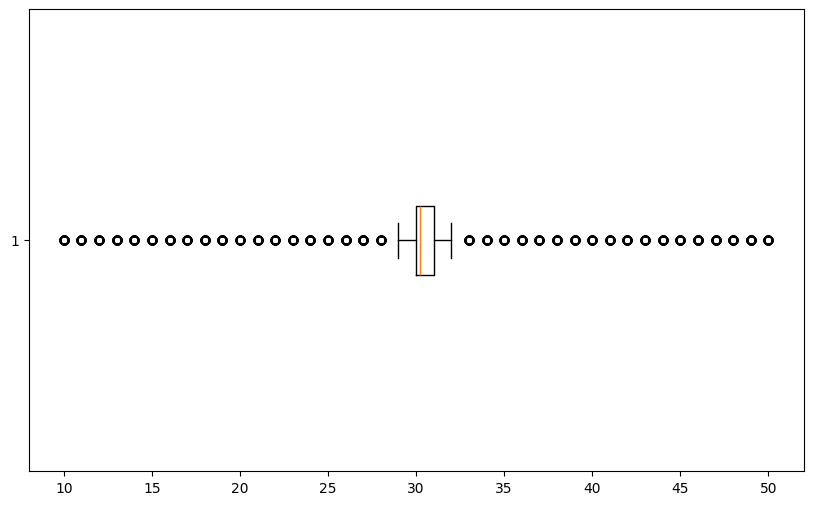

In [29]:
plt.figure(figsize=(10, 6))
plt.boxplot(clv_data['age'].dropna(), vert=False)
plt.show()

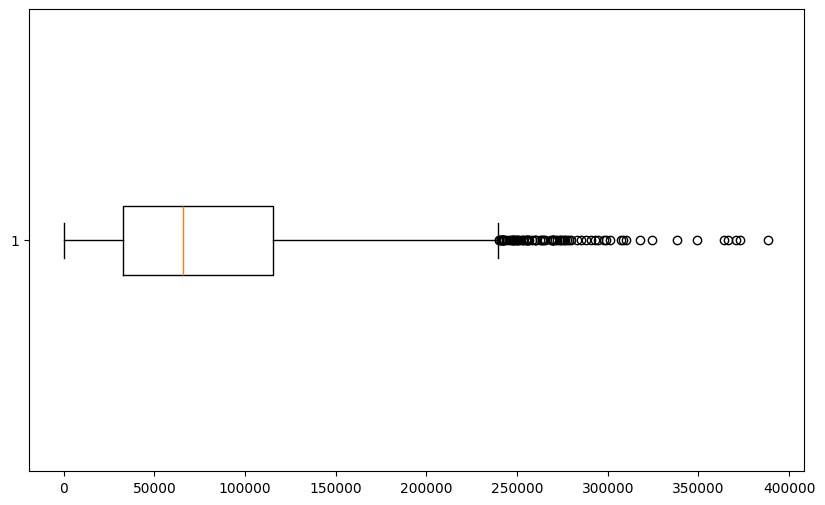

In [30]:
plt.figure(figsize=(10, 6))
plt.boxplot(clv_data['income'].dropna(), vert=False)
plt.show()

In [34]:
# Create a colorful box plot for the 'Age' column
plt.figure(figsize=(10, 6))
boxprops = dict(linestyle='-', linewidth=3, color='skyblue')
flierprops = dict(marker='o', markerfacecolor='green', markersize=12, linestyle='none')
medianprops = dict(linestyle='--', linewidth=2.5, color='firebrick')
meanprops = dict(marker='D', markeredgecolor='black', markerfacecolor='firebrick')

<Figure size 1000x600 with 0 Axes>

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:700: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  artists = ax.bxp(**boxplot_kws)


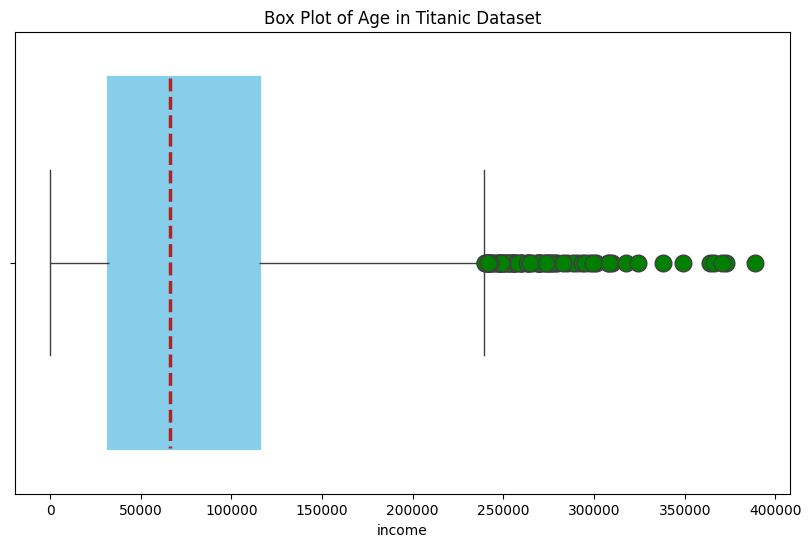

In [35]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='income', data=clv_data,vert=False, patch_artist=True,
            boxprops=boxprops, flierprops=flierprops,
            medianprops=medianprops, meanprops=meanprops)
plt.title('Box Plot of Age in Titanic Dataset')
plt.show()

### Task# 11

a. Compute z-score to detect outlier values.

b. Are the results corroborating with box-plot?

In [37]:
from scipy import stats


In [42]:
z_scores = stats.zscore(clv_data['income'])
threshold = 3
outlier_indices = np.where(np.abs(z_scores) > threshold)[0]

In [43]:
outlier_indices

array([  96,  200,  249,  423,  455,  621,  816,  838,  944, 1145, 1217,
       1241, 1386, 1568, 1606, 1676, 1822, 1943, 2006, 2011, 2126, 2502,
       2597, 2715, 2883, 3153, 3221, 3484, 3541, 3549, 3581, 3743, 3747,
       3843, 3912, 3944, 4198, 4383, 4723, 4778, 4859])

In [44]:
filtered_Data = clv_data.drop(outlier_indices)

In [45]:
filtered_Data

,age,gender,income,days_on_platform,city,purchases,income_zscore
0,30.202036,Male,126895,14.0,San Francisco,0,0.784465
1,30.202036,Male,161474,14.0,Tokyo,0,1.357933
2,24.000000,Male,104723,34.0,London,1,0.416758
3,29.000000,Male,43791,28.0,London,2,-0.593756
4,18.000000,Female,132181,26.0,London,2,0.872129
...,...,...,...,...,...,...,...
4995,30.202036,Female,212261,28.0,San Francisco,1,2.200199
4996,30.202036,Male,70228,12.0,San Francisco,0,-0.155317
4997,30.202036,Male,64995,14.0,New York City,0,-0.242103
4998,30.202036,Male,56144,4.0,New York City,2,-0.388891
